<a href="https://colab.research.google.com/github/Virajkd/ECE-curriculum-analysis-for-colleges/blob/main/Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import networkx as nx
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px

In [ ]:
file_name = '/content/drive/MyDrive/Crowd_management/ECE_final.xlsx'
df = pd.read_excel(file_name)

In [ ]:
# Load the data from a single Excel sheet
data1 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet1')  # Replace 'Sheet1' with your actual sheet name
data2 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet2')  # Replace 'Sheet2' with your actual sheet name
data3 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet3')  # Replace 'Sheet3' with your actual sheet name
data4 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet4')  # Replace 'Sheet4' with your actual sheet name
data5 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet5')  # Replace 'Sheet5' with your actual sheet name
data6 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet6')  # Replace 'Sheet6' with your actual sheet name
data7 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet7')  # Replace 'Sheet7' with your actual sheet name
data8 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet8')  # Replace 'Sheet8' with your actual sheet name

data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8], ignore_index=True)

In [ ]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
              Sem  Credit Points
count  219.000000     219.000000
mean     3.936073       2.917808
std      2.008131       1.782330
min      1.000000       0.000000
25%      2.000000       2.000000
50%      4.000000       3.000000
75%      6.000000       4.000000
max      8.000000      16.000000



Frequency Distribution of Course Types:
Subject
Communication Theory                         8
Analog Electronics                           7
Signal Processing                            6
Programming C                                6
Soft skills                                  5
                                            ..
Professional Elective-2                      1
Professional Elective-1                      1
Professional Core Elective – Group A         1
Social Pathways to Information Technology    1
Major Project                                1
Name: count, Length: 119, dtype: int64


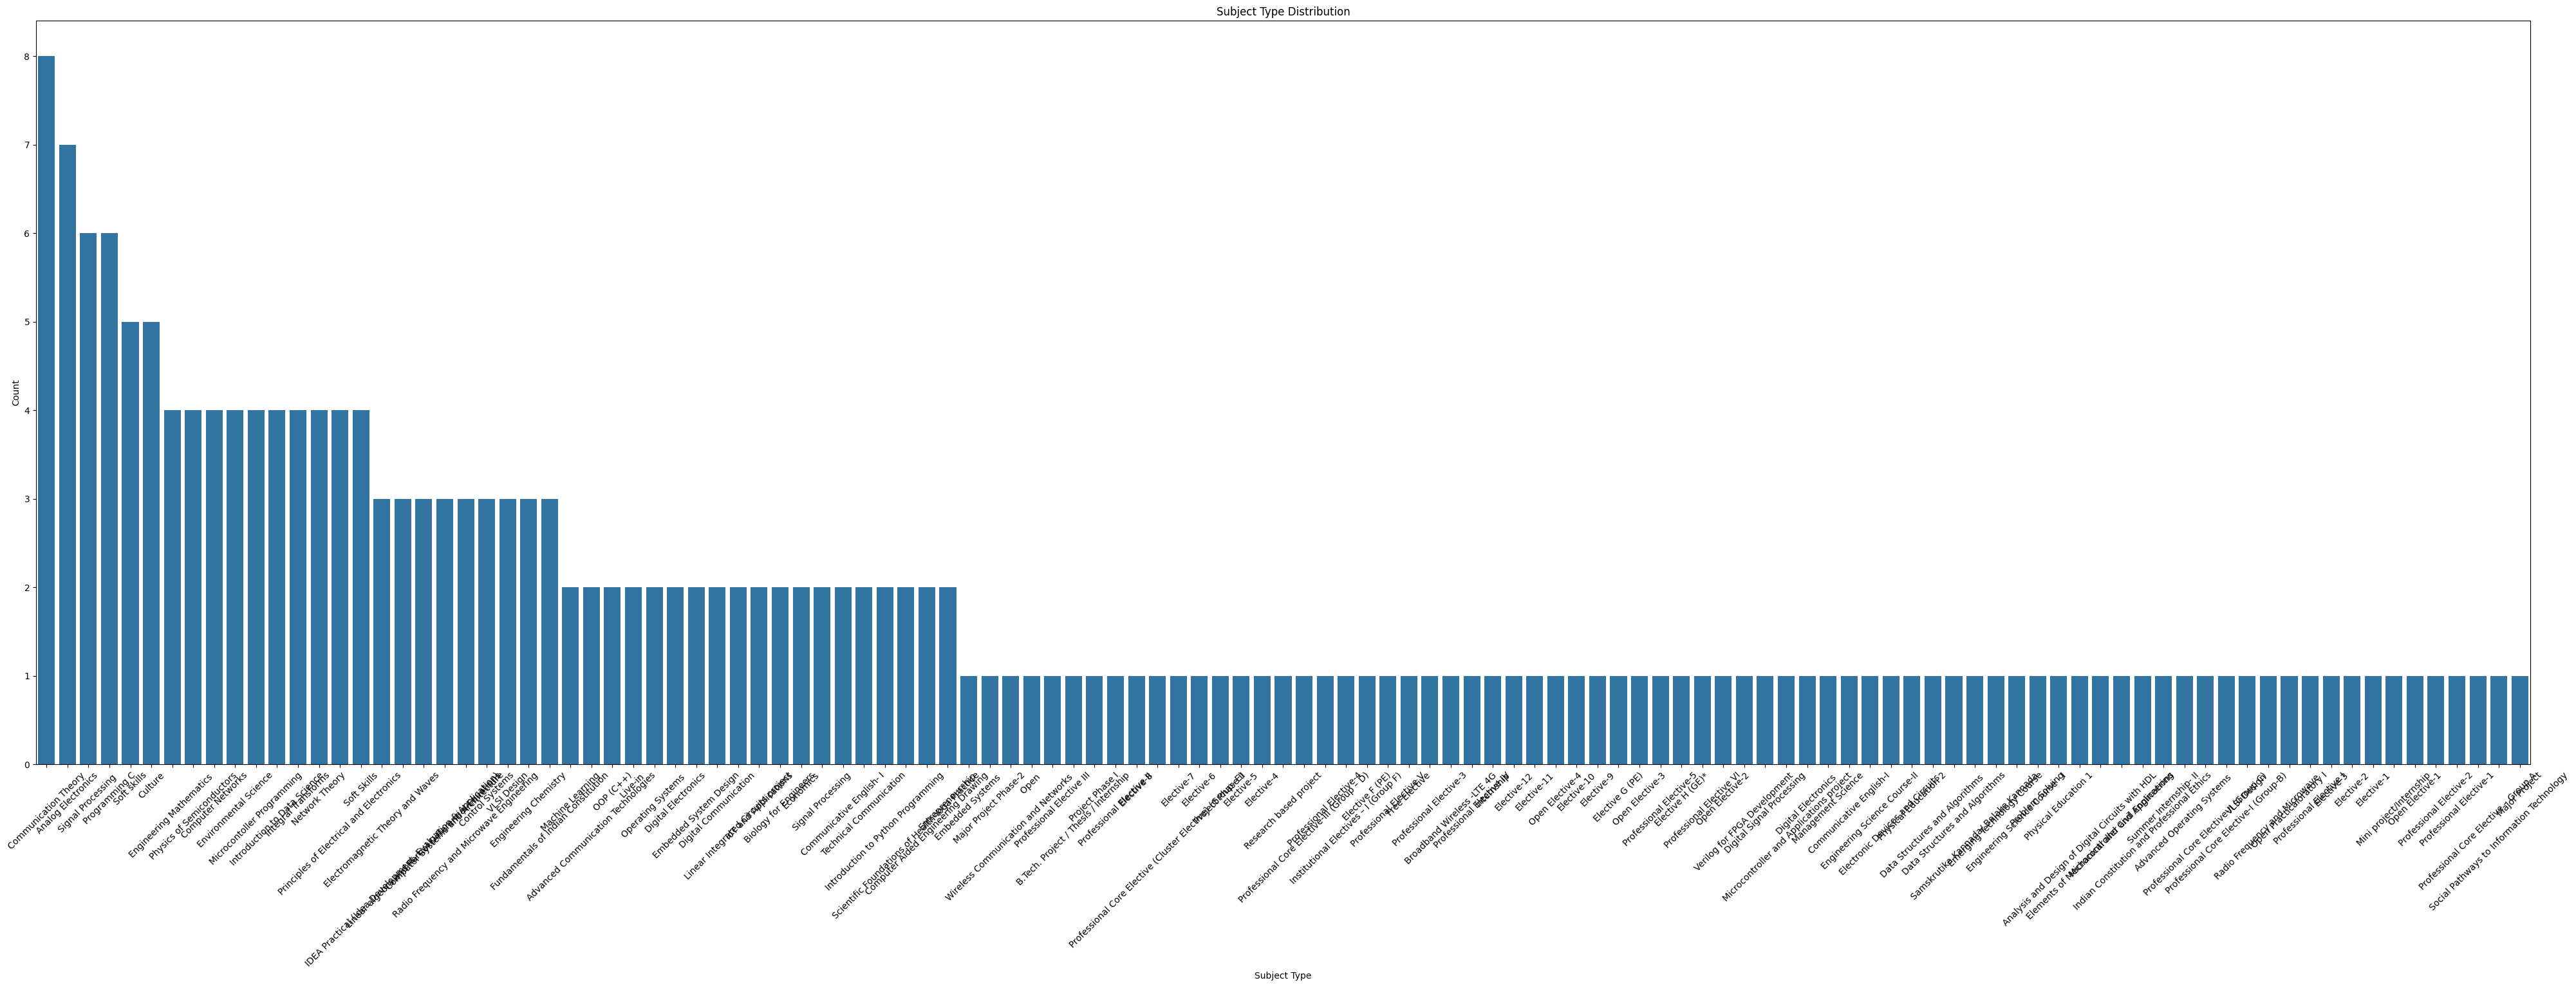

In [ ]:
# Frequency Distribution of Course Types
print("\nFrequency Distribution of Course Types:")
course_counts = data['Subject'].value_counts()
print(course_counts)

# Plot Frequency Distribution
plt.figure(figsize=(50, 15))
sns.countplot(data=data, x='Subject', order=course_counts.index)
plt.title('Subject Type Distribution')
plt.xlabel('Subject Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

0       3.0
1       3.0
2       3.0
3       4.0
4       3.0
       ... 
423     3.0
424     7.0
425    16.0
426     6.0
427    16.0
Name: Credit Points, Length: 428, dtype: float64
['Core' nan 'Core ' 'Elective']
['Core' 'Elective']
36
[0 1]

Correlation Matrix:
                    Credit Points  Core/Prof Elective
Credit Points            1.000000            0.082855
Core/Prof Elective       0.082855            1.000000


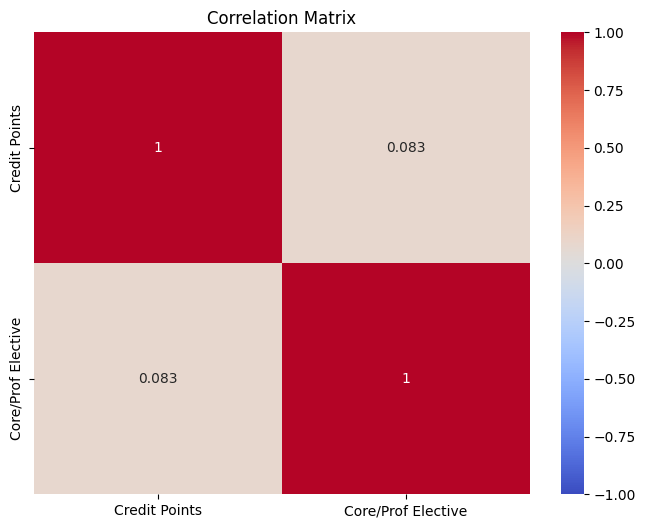

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Print initial data columns
print(data['Credit Points'])
print(data['Core/Prof Elective'].unique())

# Convert the 'Core/Prof Elective' column to string, then strip leading/trailing spaces
data['Core/Prof Elective'] = data['Core/Prof Elective'].astype(str).str.strip()

# Convert 'Credit Points' to numeric, set non-numeric values to NaN
data['Credit Points'] = pd.to_numeric(data['Credit Points'], errors='coerce')

# Remove rows with NaN values in 'Core/Prof Elective' before label encoding
data = data.dropna(subset=['Core/Prof Elective'])
data = data[data['Core/Prof Elective'] != 'nan']
print(data['Core/Prof Elective'].unique())

# Label encoding the 'Core/Prof Elective' column
label_encoder = LabelEncoder()
data['Core/Prof Elective'] = label_encoder.fit_transform(data['Core/Prof Elective'])

# Print encoded 'Core/Prof Elective' details
print(data['Core/Prof Elective'].to_list().count(1))
print(data['Core/Prof Elective'].unique())

# Drop rows with NaN values in the relevant columns
cleaned_data = data[['Credit Points', 'Core/Prof Elective']].dropna()

# Calculate and print the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = cleaned_data.corr()
print(correlation_matrix)

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


0      1
1      1
2      1
3      1
4      1
      ..
423    1
424    1
425    2
426    1
427    2
Name: cluster, Length: 219, dtype: object


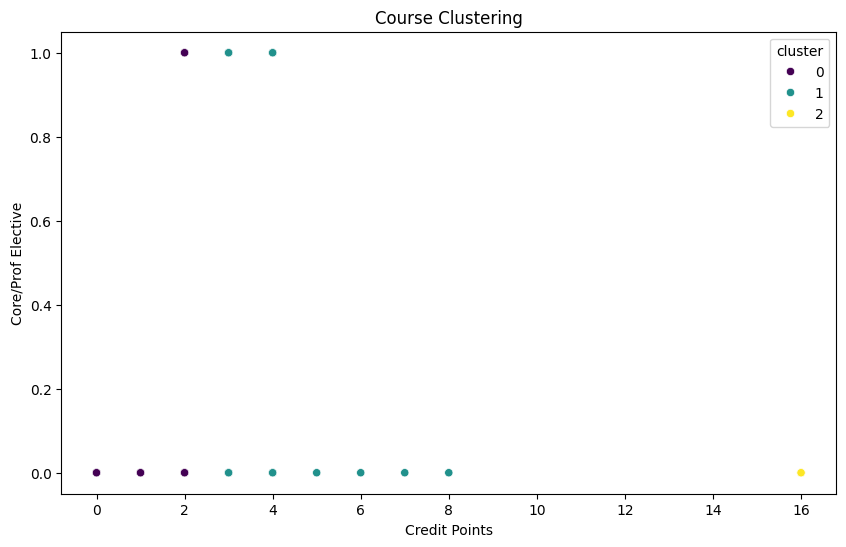

In [ ]:
# Clustering Courses
X = data[['Credit Points', 'Core/Prof Elective']].dropna()

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Create a new DataFrame for clustering results with original indices
data['cluster'] = None  # Initialize cluster column with None
data.loc[X.index, 'cluster'] = kmeans.labels_  # Assign labels only to the corresponding indices

print(data['cluster'])

# Plot Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Credit Points', y='Core/Prof Elective', hue='cluster', palette='viridis')
plt.title('Course Clustering')
plt.xlabel('Credit Points')
plt.ylabel('Core/Prof Elective')
plt.show()


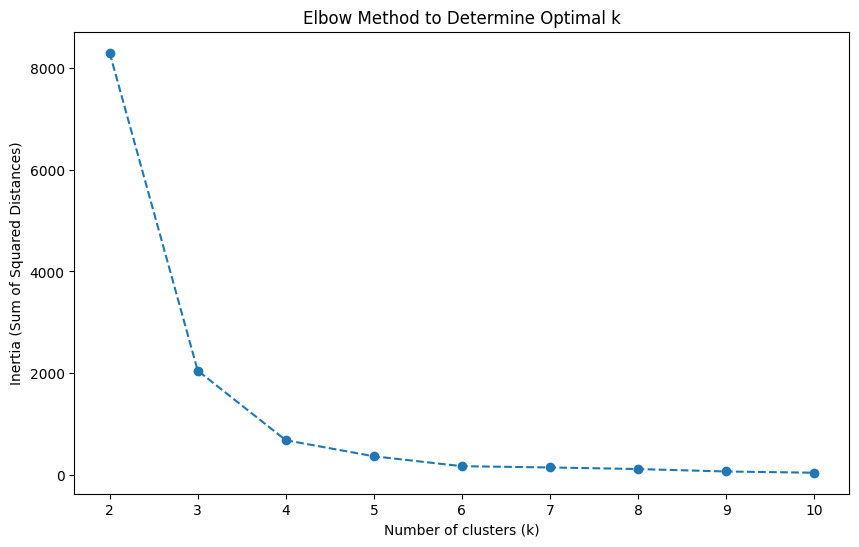

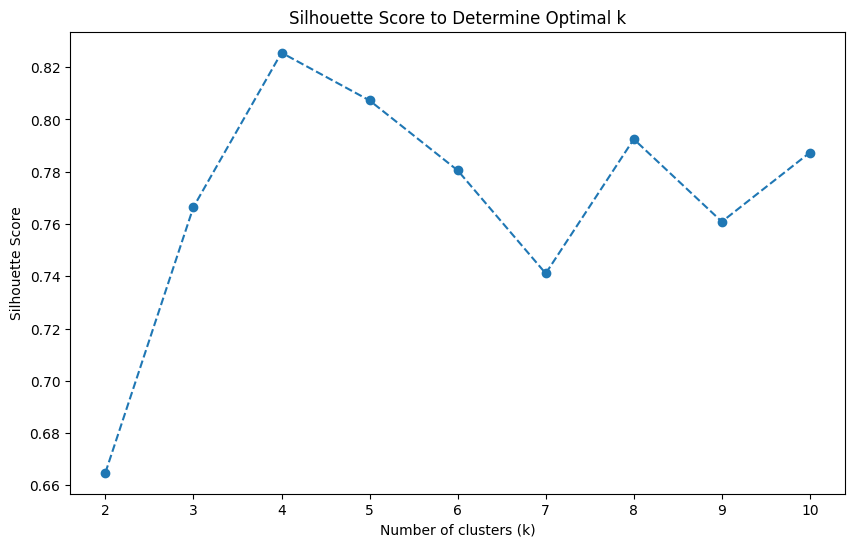

The optimal value of k based on silhouette score is: 4


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Define a range of values for k
k_values = range(2, 11)  # We will test k from 2 to 10
inertia_values = []
silhouette_scores = []

# Label encode the 'Subject' column (since it's categorical)
label_encoder = LabelEncoder()
data['Subject_encoded'] = label_encoder.fit_transform(data['Subject'])

# One-hot encode the 'Sem' column
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse
sem_encoded = encoder.fit_transform(data[['Sem']])

# Convert encoded 'Sem' column into a DataFrame with appropriate column names
sem_encoded_df = pd.DataFrame(sem_encoded, columns=encoder.get_feature_names_out(['Sem']))
# Drop missing values for clustering
X = pd.concat([data[['Subject_encoded']], sem_encoded_df], axis=1).dropna()

# Perform KMeans clustering for each value of k and compute inertia and silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia_values.append(kmeans.inertia_)  # Sum of squared distances to nearest cluster center
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))  # Silhouette score

# Plot the Elbow Method (Inertia vs. k)
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

# Plot the Silhouette Score for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the k value that maximizes the silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal value of k based on silhouette score is: {optimal_k}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (21) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


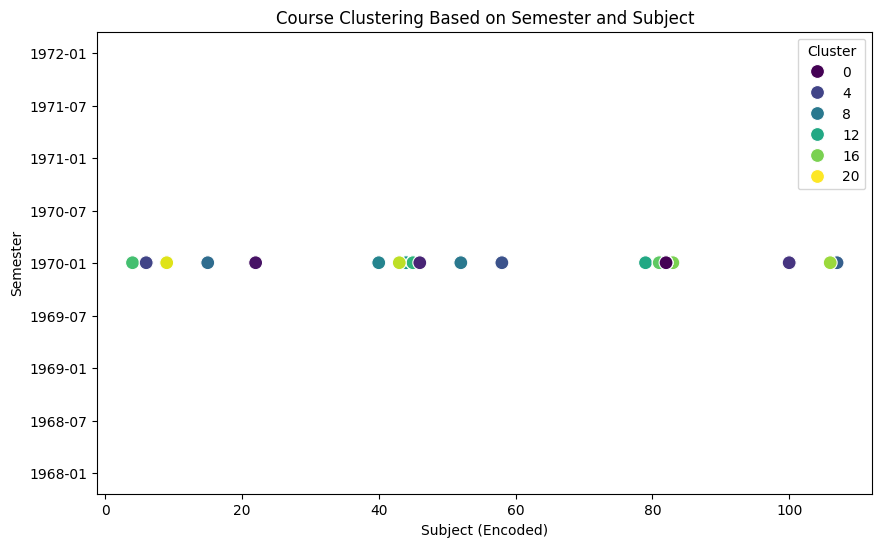

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Label encode the 'Subject' column (since it's categorical)
label_encoder = LabelEncoder()
data['Subject_encoded'] = label_encoder.fit_transform(data['Subject'])

# One-hot encode the 'Sem' column
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse
sem_encoded = encoder.fit_transform(data[['Sem']])

# Convert encoded 'Sem' column into a DataFrame with appropriate column names
sem_encoded_df = pd.DataFrame(sem_encoded, columns=encoder.get_feature_names_out(['Sem']))
# Drop rows with missing values in the columns used for clustering
X = pd.concat([data[['Subject_encoded']], sem_encoded_df], axis=1).dropna()

# Fit KMeans with 6 clusters
kmeans = KMeans(n_clusters=32, random_state=0).fit(X)

# Create a new DataFrame for clustering results with original indices
data['cluster'] = None  # Initialize cluster column with None
data.loc[X.index, 'cluster'] = kmeans.labels_  # Assign labels only to the corresponding indices

# Plot Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Subject_encoded', y='Sem', hue='cluster', palette='viridis', s=100)
plt.title('Course Clustering Based on Semester and Subject')
plt.xlabel('Subject (Encoded)')
plt.ylabel('Semester')
plt.legend(title='Cluster')
plt.show()


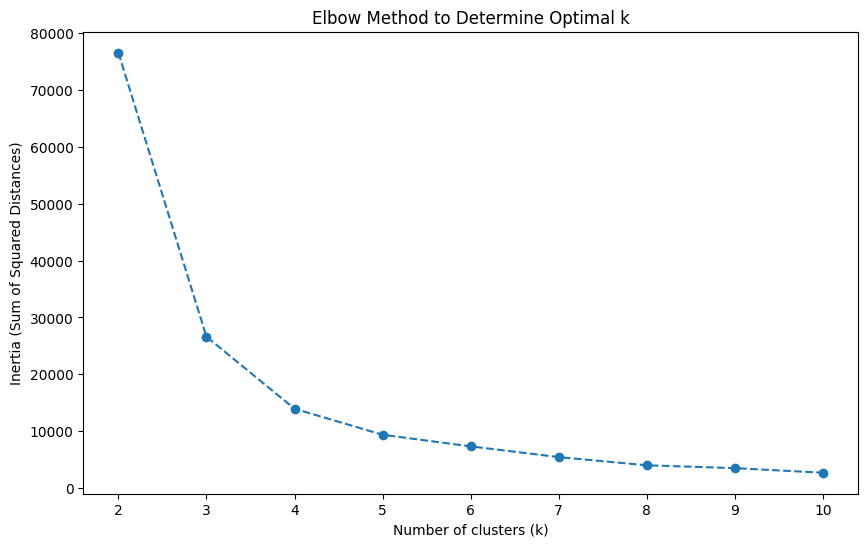

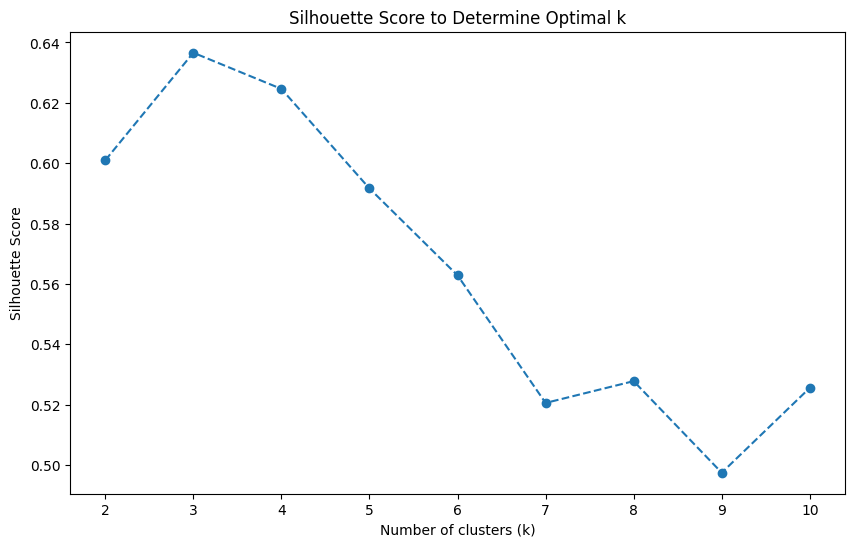

The optimal value of k based on silhouette score is: 3


In [ ]:
# Define a range of values for k
k_values = range(2, 11)  # We will test k from 2 to 10
inertia_values = []
silhouette_scores = []

# Label encode the 'College' and 'Subject' columns
label_encoder_college = LabelEncoder()
data['College_encoded'] = label_encoder_college.fit_transform(data['Offered by'])

label_encoder_subject = LabelEncoder()
data['Subject_encoded'] = label_encoder_subject.fit_transform(data['Subject'])

# Use 'College_encoded' and 'Subject_encoded' for clustering
X = data[['College_encoded', 'Subject_encoded']].dropna()  # Ensure no missing values

# Perform KMeans clustering for each value of k and compute inertia and silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia_values.append(kmeans.inertia_)  # Sum of squared distances to nearest cluster center
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))  # Silhouette score

# Plot the Elbow Method (Inertia vs. k)
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

# Plot the Silhouette Score for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the k value that maximizes the silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal value of k based on silhouette score is: {optimal_k}")


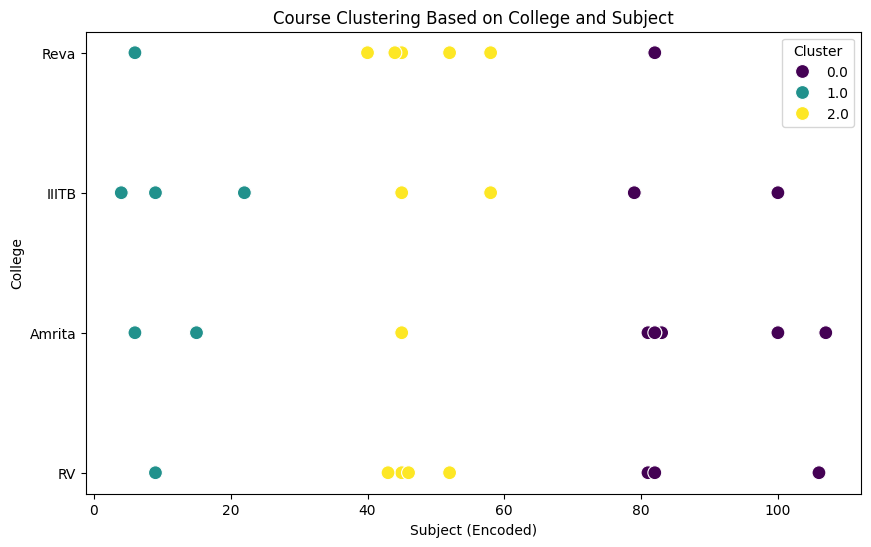

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Label encode the 'Subject' column (since it's categorical)
label_encoder = LabelEncoder()
data['Subject_encoded'] = label_encoder.fit_transform(data['Subject'])

# One-hot encode the 'College' column (replace 'Offered by' with your actual column name for College)
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse
college_encoded = encoder.fit_transform(data[['Offered by']])  # Assuming 'Offered by' is the college column

# Convert encoded 'College' column into a DataFrame with appropriate column names
college_encoded_df = pd.DataFrame(college_encoded, columns=encoder.get_feature_names_out(['Offered by']))

# Concatenate 'Subject_encoded' and 'College' one-hot encoded columns for clustering
X = pd.concat([data[['Subject_encoded']], college_encoded_df], axis=1)

# Drop rows with missing values in X
X = X.dropna()

# Fit KMeans with 3 clusters (or change the number of clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Assign cluster labels to the original dataset
data['cluster'] = None  # Initialize cluster column with None
data.loc[X.index, 'cluster'] = kmeans.labels_  # Assign labels only to the corresponding indices

# Plot Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Subject_encoded', y='Offered by', hue='cluster', palette='viridis', s=100)
plt.title('Course Clustering Based on College and Subject')
plt.xlabel('Subject (Encoded)')
plt.ylabel('College')
plt.legend(title='Cluster')
plt.show()


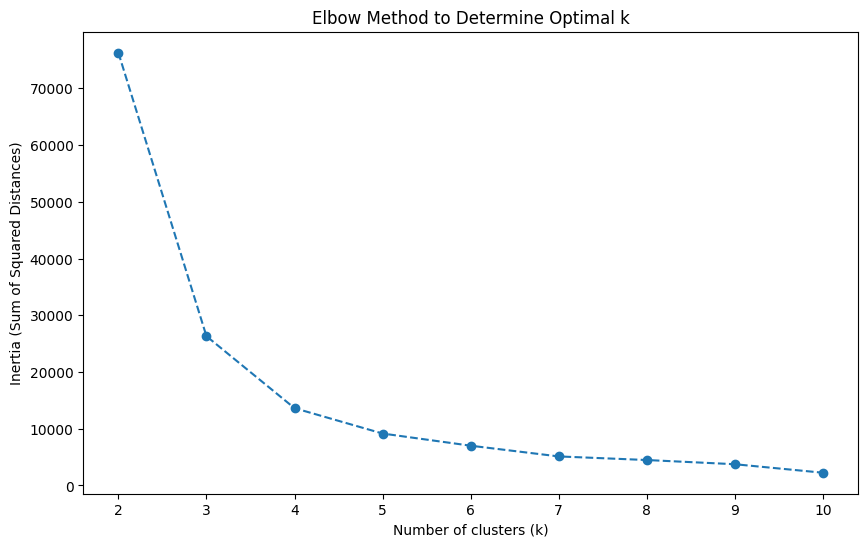

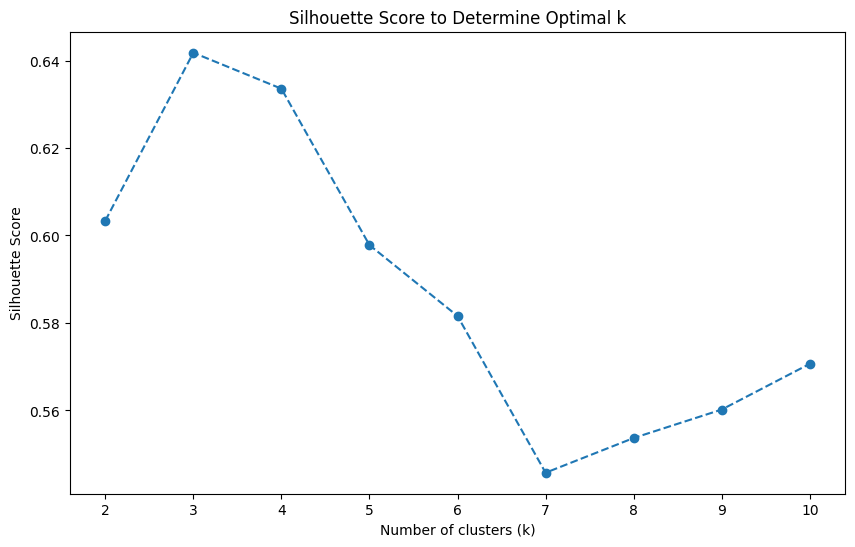

The optimal value of k based on silhouette score is: 3


In [ ]:
# Label encode the 'Subject' column
label_encoder = LabelEncoder()
data['Subject_encoded'] = label_encoder.fit_transform(data['Subject'])

# Prepare data for clustering, keeping only relevant columns
X = pd.concat([data[['Core/Prof Elective']], data[['Subject_encoded']]], axis=1).dropna()

# Define a range of values for k
k_values = range(2, 11)  # We will test k from 2 to 10
inertia_values = []
silhouette_scores = []

# Perform KMeans clustering for each value of k and compute inertia and silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X[['Subject_encoded']])  # Only clustering on 'Subject_encoded'
    inertia_values.append(kmeans.inertia_)  # Sum of squared distances to nearest cluster center
    silhouette_scores.append(silhouette_score(X[['Subject_encoded']], kmeans.labels_))  # Silhouette score

# Plot the Elbow Method (Inertia vs. k)
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

# Plot the Silhouette Score for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the k value that maximizes the silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal value of k based on silhouette score is: {optimal_k}")


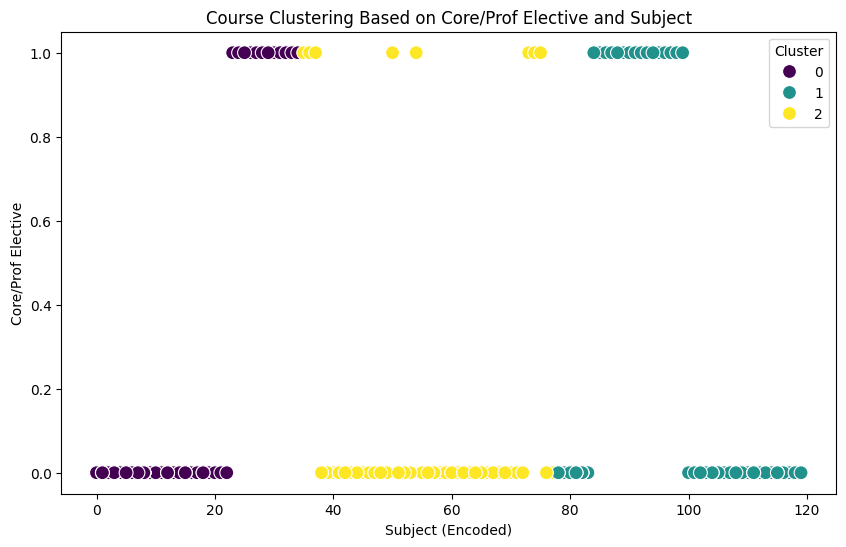

In [ ]:
# Label encode the 'Subject' column (since it's categorical)
label_encoder = LabelEncoder()
data['Subject_encoded'] = label_encoder.fit_transform(data['Subject'])

# Use 'Core/Prof Elective' and 'Subject_encoded' for clustering
X = pd.concat([data[['Core/Prof Elective']], data[['Subject_encoded']]], axis=1).dropna()

# Fit KMeans with 6 clusters (or change the number of clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X[['Subject_encoded']])  # Only clustering on 'Subject_encoded'

# Assign cluster labels to the original dataset
data['cluster'] = None  # Initialize cluster column with None
data.loc[X.index, 'cluster'] = kmeans.labels_  # Assign labels only to the corresponding indices

# Plot Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Subject_encoded', y='Core/Prof Elective', hue='cluster', palette='viridis', s=100)
plt.title('Course Clustering Based on Core/Prof Elective and Subject')
plt.xlabel('Subject (Encoded)')
plt.ylabel('Core/Prof Elective')
plt.legend(title='Cluster')
plt.show()


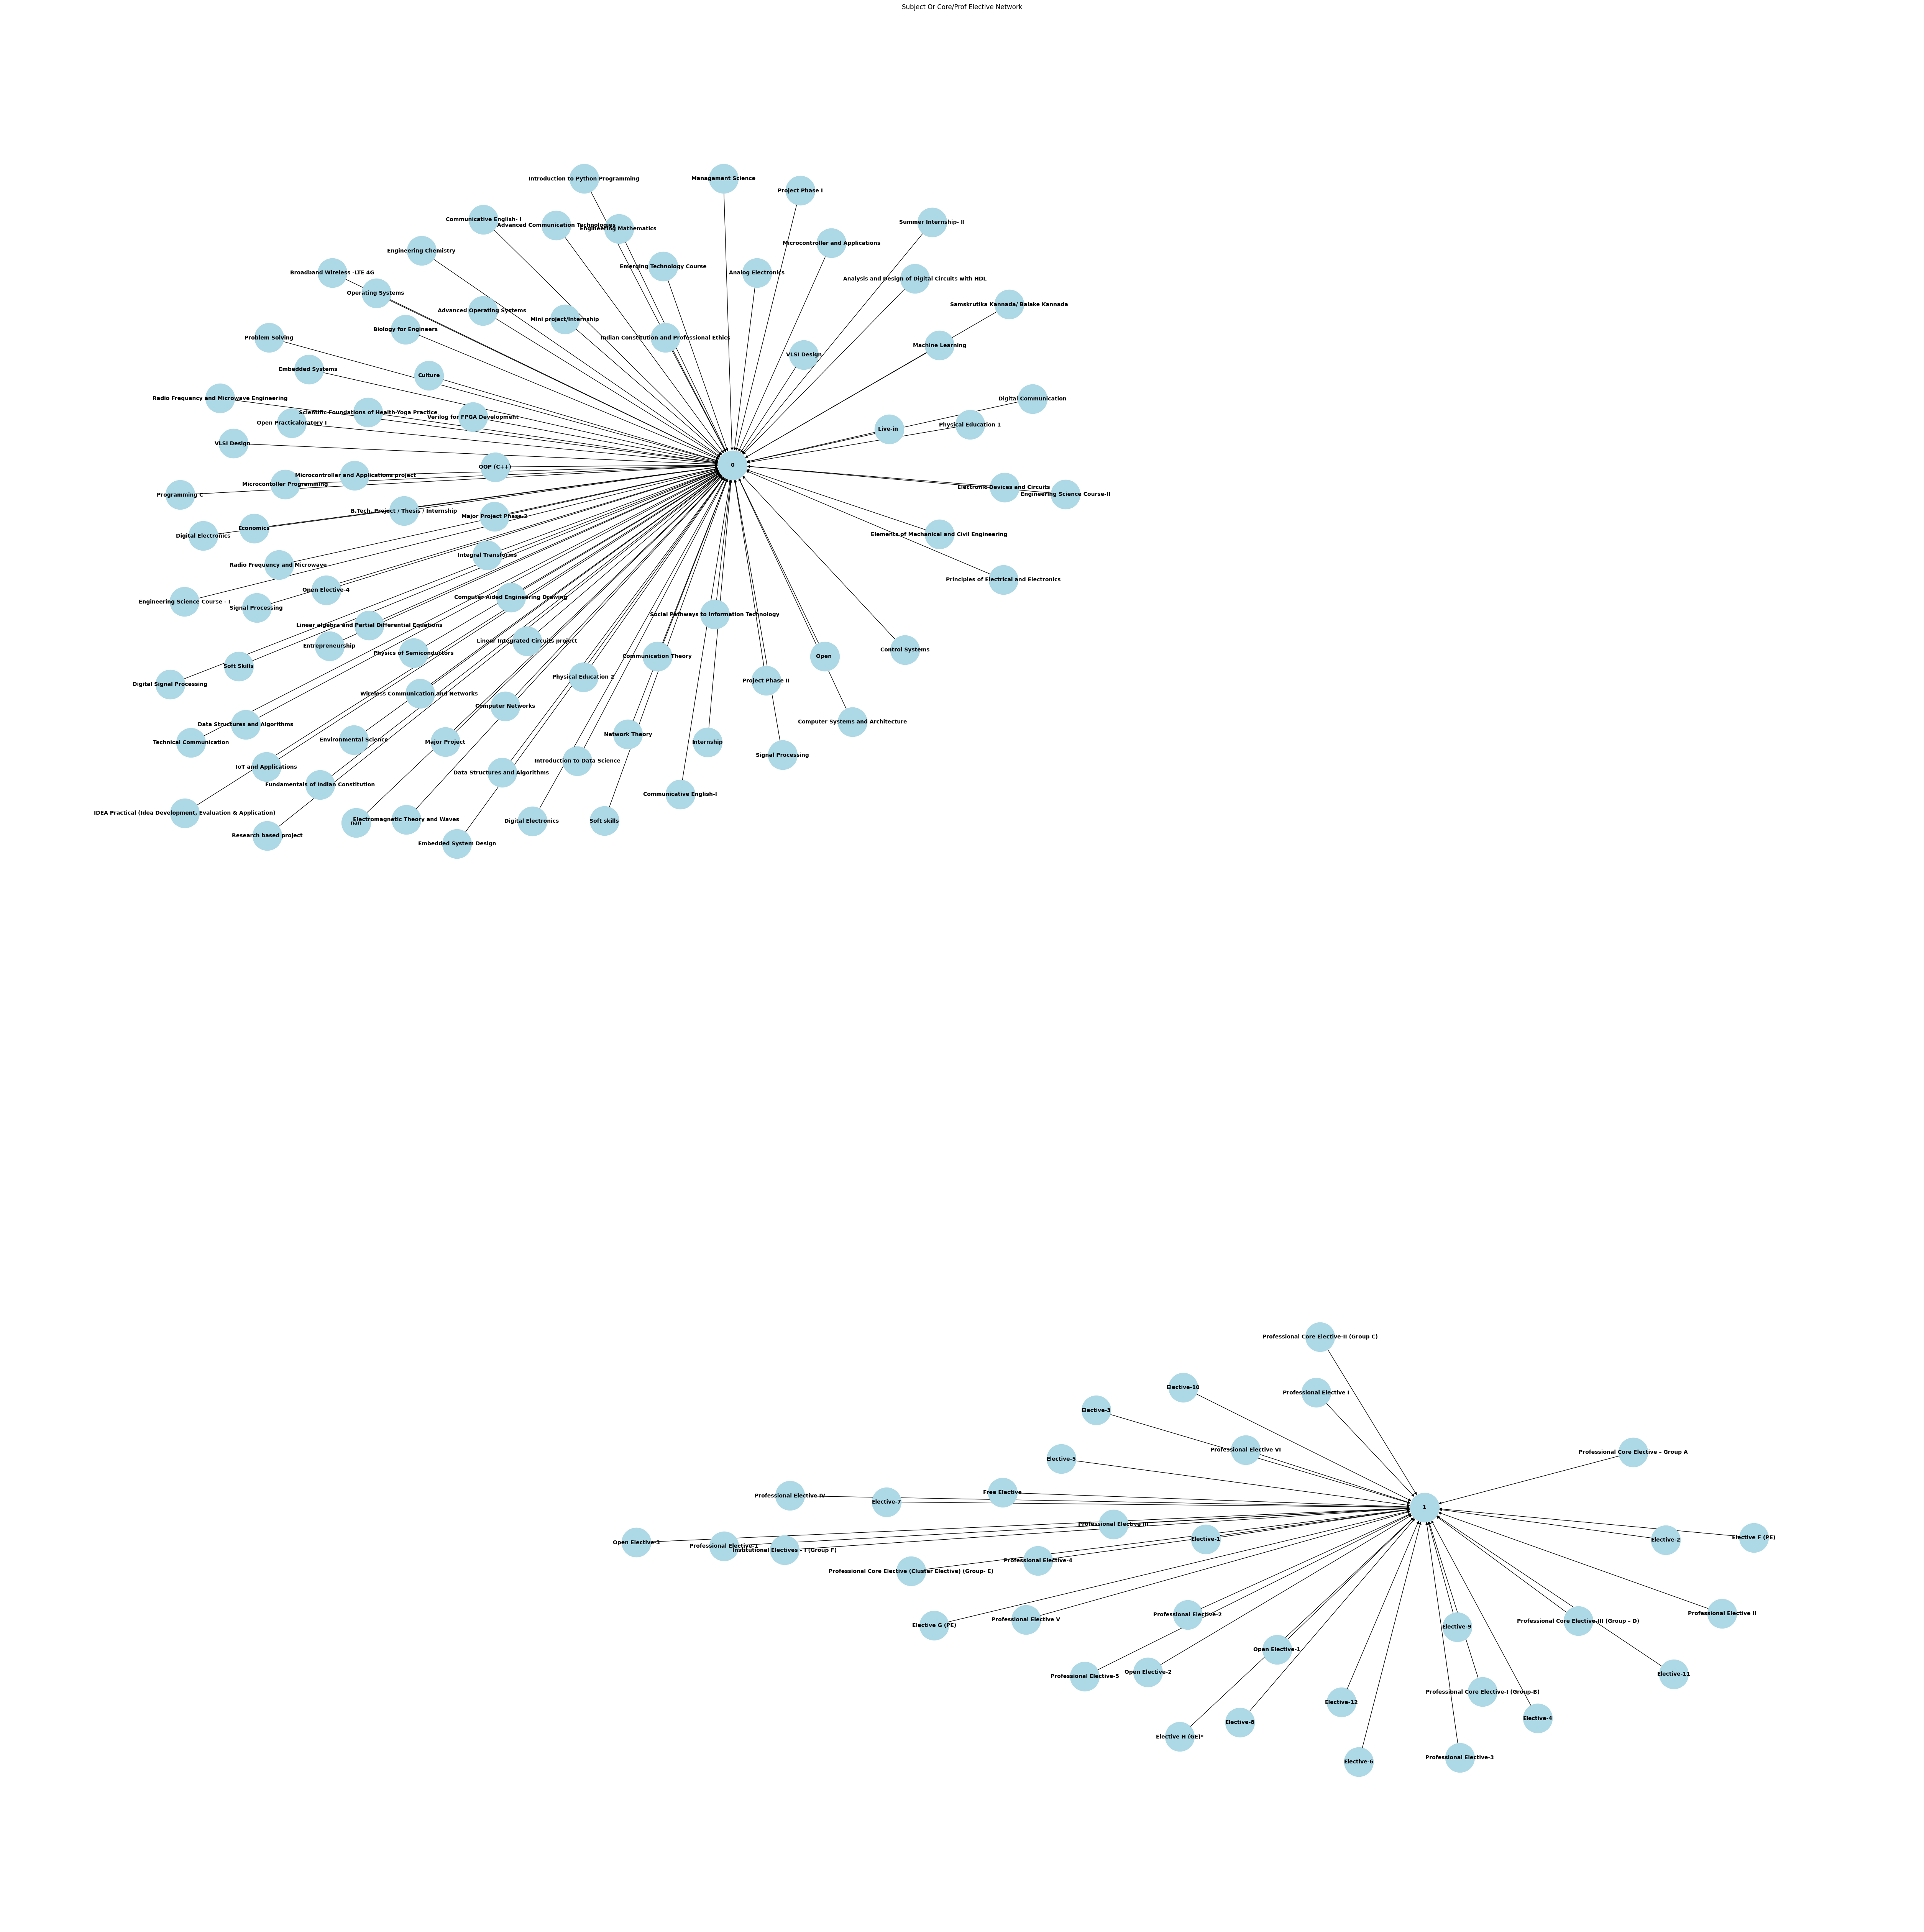

In [ ]:
# Network Analysis (Prerequisites)
G = nx.from_pandas_edgelist(data, source='Subject', target='Core/Prof Elective', create_using=nx.DiGraph)
plt.figure(figsize=(50, 50))
pos = nx.spring_layout(G, seed=0)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Subject Or Core/Prof Elective Network')
plt.show()

In [ ]:
data['Sem'] = pd.to_datetime(data['Sem'], errors='coerce')  # Convert 'Sem' to datetime

# Drop rows where 'Sem' could not be converted to datetime (if any)
data = data.dropna(subset=['Sem'])

# Set 'Sem' as the index and resample monthly
enrollment_data = data.set_index('Sem').resample('ME').sum()  # Monthly aggregation
train = enrollment_data['Subject'][:-12]
test = enrollment_data['Credit Points'][-12:]

model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Enrollment Forecast')
plt.xlabel('Date')
plt.ylabel('Enrollments')
plt.legend()
plt.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
from sklearn.linear_model import LinearRegression

# Use 'Sem' as a feature for a simple regression model
X = data[['Sem']].dropna()  # Independent variable (Semester)
y = data['Core/Prof Elective'].dropna()  # Dependent variable

# Train-test split
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast the next 12 semesters
forecast = model.predict(X_test)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, forecast, label='Forecast', linestyle='--')
plt.title('Enrollment Forecast')
plt.xlabel('Semester')
plt.ylabel('Enrollments')
plt.legend()
plt.show()

UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None

In [ ]:
# Convert 'Modules/Units in SylPracticalus' to numeric, coercing errors
'''data['Modules/Units in SylPracticalus'] = pd.to_numeric(data['Modules/Units in SylPracticalus'], errors='coerce')

# Drop any rows with NaN values in 'Modules/Units in SylPracticalus'
data = data.dropna(subset=['Modules/Units in SylPracticalus'])

# Set 'Sem' as the index and resample monthly
data['Sem'] = pd.to_datetime(data['Sem'], errors='coerce')
data = data.dropna(subset=['Sem'])'''
#enrollment_data = data.set_index('Sem').resample('M').sum()  # Monthly aggregation

enrollment_data=data.groupby('Sem').sum()

# Train-test split
train = enrollment_data['Subject'][:-12]
test = enrollment_data['Subject'][-12:]

# Ensure train data is numeric and has no NaN values
train = train.dropna()

# Time series forecasting model
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=2)
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Enrollment Forecast')
plt.xlabel('Date')
plt.ylabel('Enrollments')
plt.legend()
plt.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Sem
1970-01-01 00:00:00.000000001    32
1970-01-01 00:00:00.000000002    31
1970-01-01 00:00:00.000000003    34
1970-01-01 00:00:00.000000004    34
1970-01-01 00:00:00.000000005    31
1970-01-01 00:00:00.000000006    29
1970-01-01 00:00:00.000000007    23
1970-01-01 00:00:00.000000008     5
dtype: int64


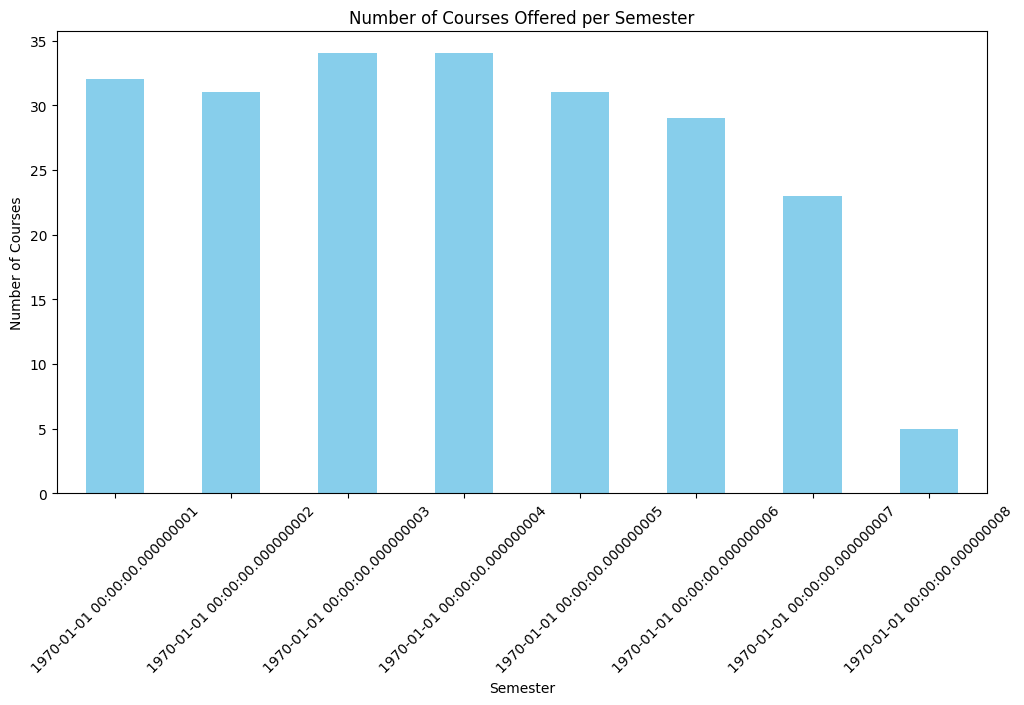

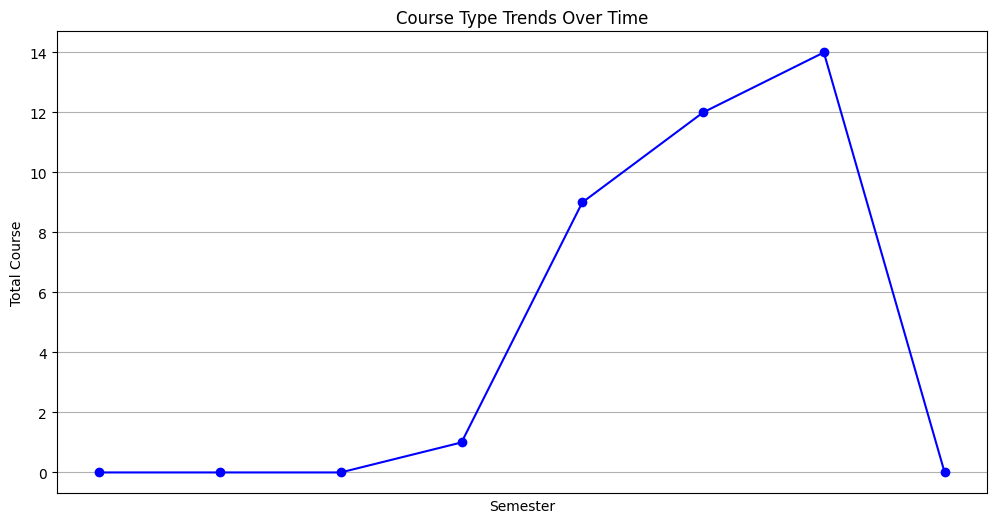

In [ ]:
# Course Offering Trends
course_offerings = data.groupby('Sem').size()
print(course_offerings)

# Convert the semester index to strings to avoid datetime formatting
course_offerings.index = course_offerings.index.astype(str)

plt.figure(figsize=(12, 6))
course_offerings.plot(kind='bar', color='skyblue')
plt.title('Number of Courses Offered per Semester')
plt.xlabel('Semester')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()

# Enrollment Trends
enrollment_trends = data.groupby('Sem').sum()

plt.figure(figsize=(12, 6))
plt.plot(enrollment_trends.index, enrollment_trends['Core/Prof Elective'], marker='o', linestyle='-', color='blue')
plt.title('Course Type Trends Over Time')
plt.xlabel('Semester')
plt.ylabel('Total Course')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
## NETWORK ANALYSIS #######
# Community Detection
from networkx.algorithms import community

# Detect communities using the Girvan-Newman method
comp = community.girvan_newman(G)
# Take the first partition
partition = list(next(comp))

# Draw the network with communities
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=0)
colors = [partition.index(G.nodes[node]['community']) for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=colors, cmap=plt.get_cmap('tab10'), font_size=10, font_weight='bold', arrows=True)
plt.title('Course Prerequisites Network with Communities')
plt.show()

In [ ]:
# Centrality Analysis
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

print("Degree Centrality:")
print(degree_centrality)
print("\nBetweenness Centrality:")
print(betweenness_centrality)


In [ ]:
## FACTOR ANALYSIS AND DIMENSIONALITY REDUCTION ########

# Factor Analysis
fa = FactorAnalysis(n_components=2)
fa_result = fa.fit_transform(data[['Credit Points','Core/Prof Elective']].dropna())
data_fa = pd.DataFrame(fa_result, columns=['Factor1', 'Factor2'])

print("Factor Analysis Results:")
print(data_fa.head())

In [ ]:
# PCA for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[['Credit Points','Core/Prof Elective']].dropna())
data_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=data_pca)
plt.title('PCA of Courses')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
## PREDICTIVE MODELLING FOR FUTURE TREND ANALYSIS ###
# Prepare data for prediction
data['Core/Prof Elective'] = pd.to_numeric(data['Core/Prof Elective'], errors='coerce')
data['Core/Prof Elective'].dropna(inplace=True)
# Use shift and dropna consistently
features = data[['Core/Prof Elective']].shift(1).dropna()
target = data['Core/Prof Elective'].iloc[1:].dropna()

# Ensure the lengths match
if len(features) != len(target):
    min_length = min(len(features), len(target))
    features = features.iloc[:min_length]
    target = target.iloc[:min_length]

print(features)
print(target)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Core/Prof Elective'], label='Actual')
plt.plot(X_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Core/Prof Elective Prediction')
plt.xlabel('Semester')
plt.ylabel('Enrollments')
plt.legend()
plt.show()

### VISUALIZATION ####
# Interactive plot for course enrollments
fig = px.scatter(data_frame=data, x='Credit Points', y='Core/Prof Elective', color='Course Type',
                 title='Course Modules vs Credits',
                 labels={'Credit Points': 'Credits', 'Core/Prof Elective': 'Courses'})
fig.show()
